## Install Pytorch

In [1]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

^C


## Clone yolov5 ultralytics respository and import Dependencies

In [2]:
!cd .. & git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd ../yolov5 & pip install -r requirements.txt

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
  Using cached scipy-1.8.0-cp38-cp38-win_amd64.whl (36.9 MB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached tensorboard-2.9.0-py3-none-any.whl (5.8 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached thop-0.0.31.post2005241907-py3-none-any.whl (8.7 kB)
  Using cached Werkzeug-2.1.2-py3-none-any.whl (224 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached google_auth-2.6.6-py2.py3-none-any.whl (156 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached protobuf-3.20.1-cp38-cp38-win_amd64.whl (904 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached p

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time

C:\Users\Nic\anaconda3\envs\BachelorThesis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Train and Load Model

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
!cd ../yolov5 && python train.py --img 320 --batch 4 --epochs 2 --data dataset.yaml --weights yolov5l.pt --workers 0

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=2, batch_size=4, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-190-g4d59f65 Python-3.8.13 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce GTX 950M, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='C:/Users/Nic/Documents/GitHub/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Nic/.cache\torch\hub\master.zip
YOLOv5  2022-5-20 Python-3.8.13 torch-1.11.0+cu113 CUDA:0 (NVIDIA GeForce GTX 950M, 4096MiB)

Fusing layers... 
Model summary: 367 layers, 46183668 parameters, 0 gradients
Adding AutoShape... 


In [8]:
img = os.path.join('data', 'images', 'car_000002_left.jpg')

In [9]:
results = model(img)

In [10]:
results.print()

image 1/1: 1080x1920 1 car
Speed: 77.0ms pre-process, 273.9ms inference, 3.0ms NMS per image at shape (1, 3, 384, 640)


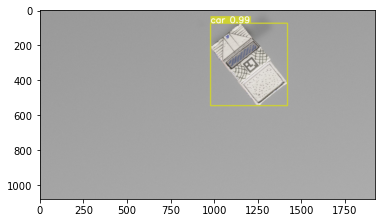

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()